In [1]:
import pandas as pd
import numpy as np

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")


In [10]:
df = pd.read_csv("../data2/df_final1.csv")
df.head()

,Age,Married,Number of Dependents,Number of Referrals,Phone Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,...,Multiple Lines_No,Multiple Lines_Yes,Streaming TV_No,Streaming TV_Yes,Streaming Music_No,Streaming Music_Yes,Streaming Movies_No,Streaming Movies_Yes,Contract_mapeada,Offer_mapeada
0,1.142857,1,0.0,0.000000,0,2,-0.375000,1,1,0,...,1,0,1,0,1,0,0,1,0,5
1,1.000000,0,1.0,0.333333,1,3,0.000000,1,0,1,...,0,1,1,0,1,0,1,0,0,4
2,0.892857,1,3.0,0.000000,1,3,1.458333,1,1,1,...,0,1,0,1,0,1,0,1,0,3
3,1.142857,0,1.0,0.333333,1,3,-0.208333,1,0,0,...,1,0,0,1,1,0,0,1,0,2
4,1.214286,0,1.0,0.333333,1,3,-0.125000,1,1,1,...,0,1,1,0,1,0,1,0,0,2


In [3]:
# dividimos el dataset en variables predictoras y respuesta
X = df.drop("Churn Value", axis = 1) # variables predictoras
y = df["Churn Value"] # variable respuesta 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)

# # Regresión Logística

In [5]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [6]:
y_pred_lr_test = lr.predict(X_test)
y_pred_lr_train = lr.predict(X_train)

In [7]:
def matriz_confusion(clases_reales, clases_predichas, total_filas_test):
  
    matriz = confusion_matrix(clases_reales, clases_predichas)

    plt.figure(figsize = (12, 8))
    sns.heatmap(matriz, square=True, annot=True, fmt="d", cmap = "viridis")

    plt.xlabel('valor predicho')
    plt.ylabel('valor real')
    plt.show()

In [8]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

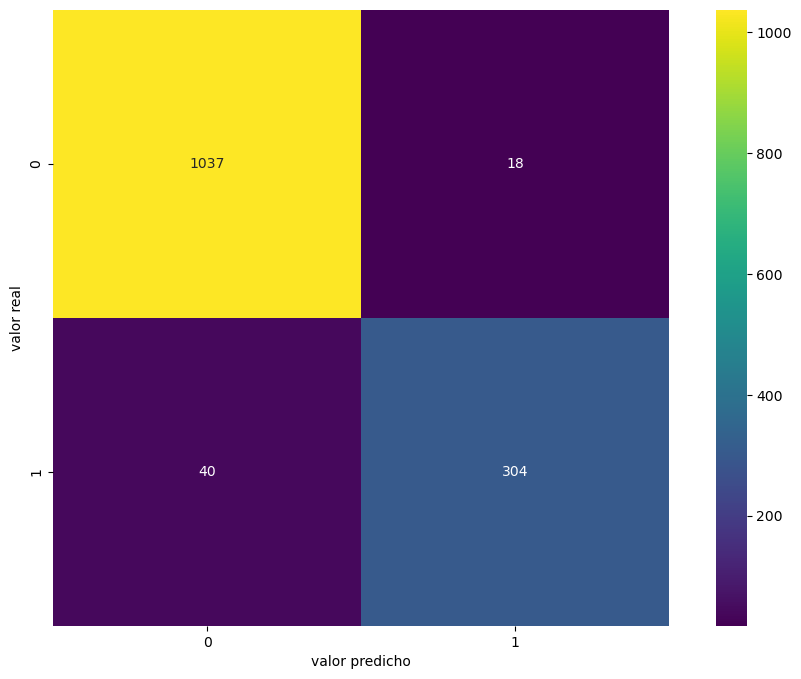

In [9]:
matriz_logistica = matriz_confusion(y_test, y_pred_lr_test, y_test.shape[0])
matriz_logistica

In [10]:
results_logistic = metricas(y_test, y_pred_lr_test, y_train, y_pred_lr_train, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.952823,0.92378,0.880814,0.901786,0.870765,test,Regresión logistica
1,0.957797,0.94147,0.895451,0.917884,0.889509,train,Regresión logistica


# Decision Tree

In [11]:
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

5.385164807134504

In [13]:
y_pred_train_dt = arbol.predict(X_train)
y_pred_test_dt = arbol.predict(X_test)

In [14]:
results_decission_tree1 = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_decission_tree1

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.941387,0.863889,0.90407,0.883523,0.84439,test,Decission Tree I
1,1.000000,1.000000,1.00000,1.000000,1.00000,train,Decission Tree I


In [16]:
# veamos cual es la profundidad de nuestro árbol
print(arbol.tree_.max_depth)

21


In [17]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param = {"max_depth": [2,3,4,6,8,10,11,12,13,14,15,16,17,18,19],
         "min_samples_split": [25,50, 100, 125, 150, 200, 250],
         "max_features": [1,2,3,4,5], 
         "min_samples_leaf": [25, 50, 100, 125, 150, 200, 250]}

# Búsqueda por grid search con validación cruzada
# ==============================================================================
arbol2 = GridSearchCV(
        estimator = DecisionTreeClassifier(), 
        param_grid = param, 
        n_jobs = -1,
        verbose = 1, 
        cv = 10, 
        return_train_score = True, 
        scoring = "neg_mean_squared_error")

In [18]:
arbol2.fit(X_train, y_train)

Fitting 10 folds for each of 3675 candidates, totalling 36750 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 6, 8, 10, 11, 12, 13, 14, 15,
                                       16, 17, 18, 19],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [25, 50, 100, 125, 150, 200, 250],
                         'min_samples_split': [25, 50, 100, 125, 150, 200,
                                               250]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [19]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
arbol2.best_params_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------


{'max_depth': 12,
 'max_features': 5,
 'min_samples_leaf': 25,
 'min_samples_split': 200}

In [20]:
# creamos el modelo con los mejores parámetros para hacer las predicciones
arbol3 = DecisionTreeClassifier( max_depth =  12, max_features=5, min_samples_split=200)
arbol3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, max_features=5, min_samples_split=200)

In [21]:
# hacemos las predicciones para el train y el test
y_pred_arbol_test= arbol3.predict(X_test)
y_pred_arbol_train= arbol3.predict(X_train)

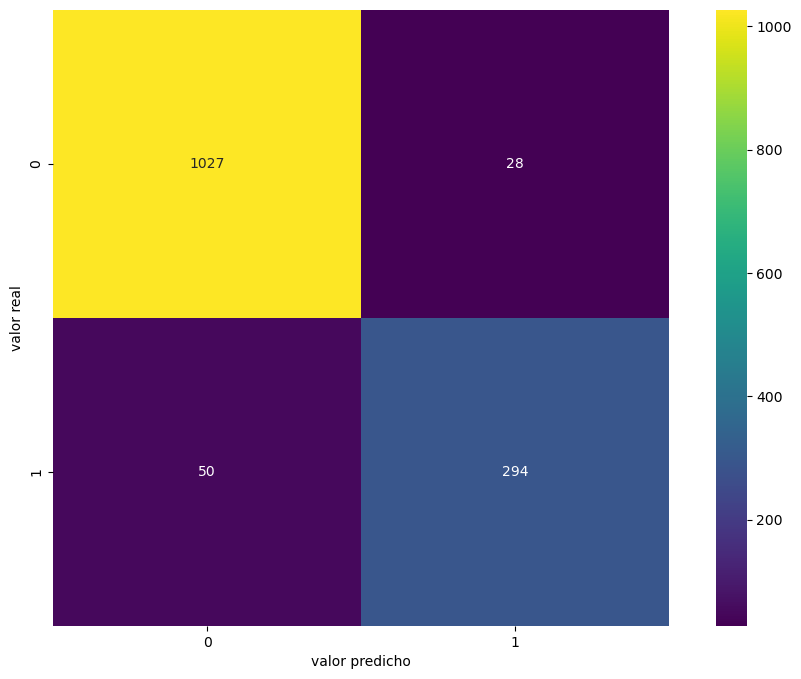

In [22]:
matriz_arbol = matriz_confusion(y_test, y_pred_arbol_test, y_test.shape[0])
matriz_arbol

In [26]:
results_decission_tree2 =  metricas(y_test, y_pred_arbol_test, y_train, y_pred_arbol_train, "Decission Tree II")
results_decission_tree2

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.944246,0.913043,0.854651,0.882883,0.84635,test,Decission Tree II
1,0.945637,0.926331,0.862186,0.893108,0.85672,train,Decission Tree II


In [27]:
# juntamos los resultados con los del modelo anterior
df_all_results = pd.concat([results_logistic, results_decission_tree2], axis = 0)
df_all_results

NameError: name 'results_logistic' is not defined